In [1]:
# import modules
%matplotlib inline
import MDAnalysis as md
import MDAnalysis.analysis.distances
import numpy as np
import numpy.ma as ma
import math as math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import gro/pdb and trajectory files
# select atoms for distances to be calculated between
print("Reading in trajectory for atom positions...")
universes = [md.Universe('min.gro','a3a3_160K_traj_comp_05_12.xtc')]

u = md.Universe('min.gro','a3a3_160K_traj_comp_05_12.xtc')
ag = u.select_atoms('protein')

print("No. of frames = {}".format(len(u.trajectory)))

Reading in trajectory for atom positions...
No. of frames = 237010


In [3]:
# A basic code for matrix input from user 
N = len(ag)

n = len(u.trajectory[0:50]) 
  
# Initialize matrix 
print("initializing matrix...")
matrix = np.ndarray((n, n), dtype=np.float32)
  
print('calculating drmsd matrix...')
for i in range(n-1):          # A for loop for row entries 
    ts = u.trajectory[i]
    distance_array1 = MDAnalysis.analysis.distances.self_distance_array(ag.ts.positions)
      
    for j in range(i+1,n):      # A for loop for column entries 
          
        ts = u.trajectory[j]
        distance_array2 = MDAnalysis.analysis.distances.self_distance_array(ag.ts.positions)
    
        difference = distance_array1 - distance_array2
    
        positive_difference = difference**2
    
        drmsd = np.sqrt((np.sum(positive_difference)*(1/(N*(N-1)))))
        
        matrix[i][j] = drmsd
         

print('Done!')

# Save dRMSD matrix
drmsd_matrix_filename = '160_a3a3_drmsd_matrix_{}_frames'.format(n)
np.save(drmsd_matrix_filename, matrix)

initializing matrix...
calculating drmsd matrix...
Done!


In [4]:
# load dRMSD matrix
N = len(ag)

n = len(u.trajectory[0:50]) 

drmsd_matrix_filename = '160_a3a3_drmsd_matrix_{}_frames.npy'.format(n)
matrix = np.load(drmsd_matrix_filename)

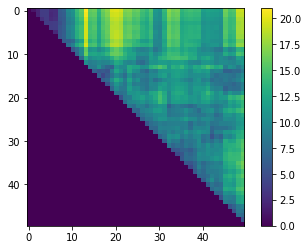

In [5]:
plt.imshow(matrix)
plt.colorbar()

In [6]:
# Transpose matrix to fill in under the diagnol
matrix+=matrix.T

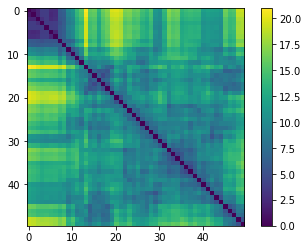

In [9]:
plt.imshow(matrix)
plt.colorbar()

In [ ]:
#My QT Clustering Code
cutoff=4
frames=np.arange(n)
matrix_temp=matrix

count=0
while np.argmax(np.sum(matrix_temp<10,1))>1:
    count+=1
    biggest_node = np.argmax(np.sum(matrix_temp<cutoff,1))
    index=np.where(matrix_temp[biggest_node,:]<10)[0]
    matrix_=matrix_temp[index,:][:,index]
    red_matrix1=np.delete(matrix_temp,index,axis=0)
    red_matrix2=np.delete(red_matrix1,index,axis=1)
    red_frames=np.delete(frames,index)
    cluster_frames=frames[index]
    np.savetxt('cluster.'+str(count)+'dat',int(cluster_frames))
    frames=red_frames                      
    matrix_temp=red_matrix2                         

In [ ]:
int(cluster_frames

In [ ]:
plt.imshow(matrix_temp)
plt.colorbar()

In [ ]:
print(index)